In [1]:
#!ls /content/drive/MyDrive/CV\ project/data/image

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [4]:
 #!7za -y x "/content/drive/MyDrive/CV project/data/image/origin.7z.*"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/CV project/data/image/                                                       8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/CV project/data/image/origin.7z.001
--
Path = /content/drive/MyDrive/CV project/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg                            

In [5]:
 #!cp -r ./origin "/content/drive/MyDrive/CV project"

In [6]:
label_file_path=r"/content/drive/MyDrive/CV project/data/label/label.lst"
images_folder_path=r"/content/drive/MyDrive/CV project/origin"

In [7]:
from numpy import split
import pandas as pd
df_info = pd.read_csv(label_file_path,sep=" ",header=None)
col_names="image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_cofidence expression_label".split()
df_info.columns = col_names

df_info.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


In [8]:
df_sel=df_info[df_info.face_box_cofidence>30]

In [9]:
df_sel.shape

(69405, 8)

Graph is Optional it is just to visualize the data

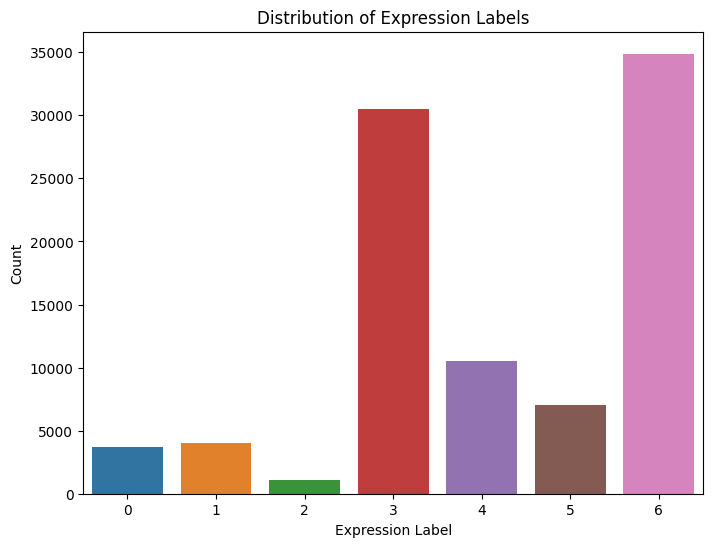

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a bar chart for expression labels
plt.figure(figsize=(8, 6))
sns.countplot(x='expression_label', data=df_info)
plt.xlabel('Expression Label')
plt.ylabel('Count')
plt.title('Distribution of Expression Labels')
plt.show()


In [14]:
from numpy.core.fromnumeric import resize
import cv2
import matplotlib.pyplot as plt
import os
x = []
y = []
for i, row in df_sel.sample(100).iterrows():
    img_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]
    img_path = os.path.join(images_folder_path, img_name)
    img = cv2.imread(img_path)
    # Check if img is not None
    if img is not None:
    #     # Crop the image using the provided coordinates
         cropped_img = img[y1:y2, x1:x2]
    else:
        continue

    if cropped_img is not None:
      resized_face = cv2.resize(cropped_img , ( 64,64))
    else:
      continue

    x.append(resized_face)
    y.append(label)

In [15]:
import numpy as np
X=np.array(x)
Y=np.array(y)

In [16]:
X

array([[[[ 85,  64,  56],
         [ 82,  62,  51],
         [ 81,  59,  48],
         ...,
         [ 70,  72,  72],
         [ 81,  81,  81],
         [ 80,  76,  75]],

        [[ 85,  63,  56],
         [ 81,  60,  50],
         [ 80,  58,  47],
         ...,
         [ 70,  71,  69],
         [ 67,  68,  66],
         [ 73,  69,  68]],

        [[ 81,  59,  52],
         [ 79,  57,  51],
         [ 79,  56,  48],
         ...,
         [ 61,  59,  59],
         [ 63,  62,  62],
         [ 50,  47,  48]],

        ...,

        [[ 63,  59,  58],
         [ 74,  58,  54],
         [ 91,  60,  49],
         ...,
         [219, 212, 212],
         [232, 216, 208],
         [242, 215, 198]],

        [[ 56,  52,  47],
         [ 75,  54,  49],
         [ 91,  57,  50],
         ...,
         [230, 212, 205],
         [233, 208, 197],
         [242, 213, 197]],

        [[ 48,  42,  33],
         [ 71,  45,  39],
         [ 83,  50,  46],
         ...,
         [230, 203, 192],
        

In [17]:
Y

array([6, 3, 6, 6, 4, 4, 3, 6, 4, 4, 3, 4, 5, 3, 3, 3, 6, 6, 6, 6, 4, 3,
       6, 3, 3, 4, 5, 6, 6, 4, 6, 4, 3, 4, 0, 6, 6, 3, 4, 6, 0, 3, 4, 3,
       3, 5, 3, 3, 1, 3, 5, 6, 6, 4, 3, 5, 5, 3, 3, 6, 3, 3, 6, 3, 3, 6,
       0, 3, 6, 3, 3, 2, 6, 3, 6, 6, 6, 5, 3, 3, 6, 6, 3, 6, 1, 3, 6, 4,
       3, 6, 4, 6, 6, 3, 4, 3, 3, 3, 0, 6])

In [18]:
len(X)

100

In [19]:
len(Y)

100

In [20]:
X.shape

(100, 64, 64, 3)

In [21]:
Y.shape

(100,)

In [22]:
normalized_X = X / 255.0

In [23]:
normalized_X

array([[[[0.33333333, 0.25098039, 0.21960784],
         [0.32156863, 0.24313725, 0.2       ],
         [0.31764706, 0.23137255, 0.18823529],
         ...,
         [0.2745098 , 0.28235294, 0.28235294],
         [0.31764706, 0.31764706, 0.31764706],
         [0.31372549, 0.29803922, 0.29411765]],

        [[0.33333333, 0.24705882, 0.21960784],
         [0.31764706, 0.23529412, 0.19607843],
         [0.31372549, 0.22745098, 0.18431373],
         ...,
         [0.2745098 , 0.27843137, 0.27058824],
         [0.2627451 , 0.26666667, 0.25882353],
         [0.28627451, 0.27058824, 0.26666667]],

        [[0.31764706, 0.23137255, 0.20392157],
         [0.30980392, 0.22352941, 0.2       ],
         [0.30980392, 0.21960784, 0.18823529],
         ...,
         [0.23921569, 0.23137255, 0.23137255],
         [0.24705882, 0.24313725, 0.24313725],
         [0.19607843, 0.18431373, 0.18823529]],

        ...,

        [[0.24705882, 0.23137255, 0.22745098],
         [0.29019608, 0.22745098, 0.21176471]

In [32]:
from keras.utils import to_categorical

# Assuming Y_train contains integer class labels ranging from 0 to 6
Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_val_one_hot = to_categorical(Y_val, num_classes=7)


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'x' is your input features and 'y' is the corresponding target labels
# Replace these with your actual data arrays

# Split the data into training (70%), testing (15%), and validation (15%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Display the sizes of each split
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 70
Validation set size: 15
Testing set size: 15


In [39]:
X_train.shape

(70, 64, 64, 3)

In [34]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Assuming 'x_train' is your training data and 'y_train' are the corresponding labels
# Replace these with your actual training data and labels

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Random shear
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for newly created pixels
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

# Generate augmented data batches
augmented_data_generator = datagen.flow(X_train, Y_train, batch_size=32)

In [48]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Assuming 'X_train', 'Y_train', 'X_val', and 'Y_val' are your training data and labels, respectively
# Replace these with your actual training data and labels

# One-hot encode the target labels
Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_val_one_hot = to_categorical(Y_val, num_classes=7)

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
# Compile the model
emotion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary for debugging
emotion_model.summary()


# Create an ImageDataGenerator instance with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the ImageDataGenerator on your training data
datagen.fit(X_train)

# Train the model using the augmented data
#history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
#epochs=100,
                    #validation_data=(X_val, Y_val))


# Train the model
history = emotion_model.fit(X_train, Y_train_one_hot, epochs=100, batch_size=32, validation_data=(X_val, Y_val_one_hot))


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_45 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                